In [1]:
import requests
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
path = "C:\\Users\\Flore\\Desktop\\EDA_SURF ESKOLA\\EDA\\2. src_data\\1.2. atracciones_recursos_turisticosII.csv"
tendencia_ocio = pd.read_csv(path, sep=";")
tendencia_ocio

,CATEGORIA,CCAA,PROVINCIA,VALORACION_POR_CATEGORIA,TOTAL_OPINIONES_CATEGORIA,VALORACION_GENERAL,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Err:501
0,Naturaleza,Andalucia,Almeria,"4,43",16866,"4,26",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Naturaleza,Andalucia,Cadiz,"4,41",8593,"4,31",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Naturaleza,Andalucia,Cordoba,"4,49",2543,"4,31",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Naturaleza,Andalucia,Granada,"4,56",13820,"4,41",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Naturaleza,Andalucia,Huelva,"4,26",5612,"4,15",NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,Vida Nocturna,Pais Vasco,Araba/Alava,"3,75",434,"4,43",NaN,NaN,NaN,NaN,NaN,NaN,NaN
487,Vida Nocturna,Pais Vasco,Bizkaia,"4,26",2335,"4,36",NaN,NaN,NaN,NaN,NaN,NaN,NaN
488,Vida Nocturna,Pais Vasco,Gipuzkoa,"4,04",2207,"4,4",NaN,NaN,NaN,NaN,NaN,NaN,NaN
489,Vida Nocturna,Principado,Asturias,"4,15",4064,"4,38",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
tendencia_ocio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CATEGORIA                  491 non-null    object 
 1   CCAA                       491 non-null    object 
 2   PROVINCIA                  491 non-null    object 
 3   VALORACION_POR_CATEGORIA   491 non-null    object 
 4   TOTAL_OPINIONES_CATEGORIA  491 non-null    int64  
 5   VALORACION_GENERAL         491 non-null    object 
 6   Unnamed: 6                 0 non-null      float64
 7   Unnamed: 7                 0 non-null      float64
 8   Unnamed: 8                 0 non-null      float64
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
 12  Err:501                    0 non-null      float64
dtypes: float64(7), int64(1), object(5)
memory usage: 5

In [4]:
convertir_columnas= ["TOTAL_OPINIONES_CATEGORIA", "VALORACION_GENERAL"]
for columna in convertir_columnas:
     tendencia_ocio[columna] = tendencia_ocio[columna].replace({',': '.'}, regex=True)
     tendencia_ocio[columna] = pd.to_numeric(tendencia_ocio[columna], errors='coerce')  # Convertir a numérico
print(tendencia_ocio[convertir_columnas])





     TOTAL_OPINIONES_CATEGORIA  VALORACION_GENERAL
0                        16866                4.26
1                         8593                4.31
2                         2543                4.31
3                        13820                4.41
4                         5612                4.15
..                         ...                 ...
486                        434                4.43
487                       2335                4.36
488                       2207                4.40
489                       4064                4.38
490                        666                4.26

[491 rows x 2 columns]


In [5]:
tendencia_ocio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CATEGORIA                  491 non-null    object 
 1   CCAA                       491 non-null    object 
 2   PROVINCIA                  491 non-null    object 
 3   VALORACION_POR_CATEGORIA   491 non-null    object 
 4   TOTAL_OPINIONES_CATEGORIA  491 non-null    int64  
 5   VALORACION_GENERAL         491 non-null    float64
 6   Unnamed: 6                 0 non-null      float64
 7   Unnamed: 7                 0 non-null      float64
 8   Unnamed: 8                 0 non-null      float64
 9   Unnamed: 9                 0 non-null      float64
 10  Unnamed: 10                0 non-null      float64
 11  Unnamed: 11                0 non-null      float64
 12  Err:501                    0 non-null      float64
dtypes: float64(8), int64(1), object(4)
memory usage: 5

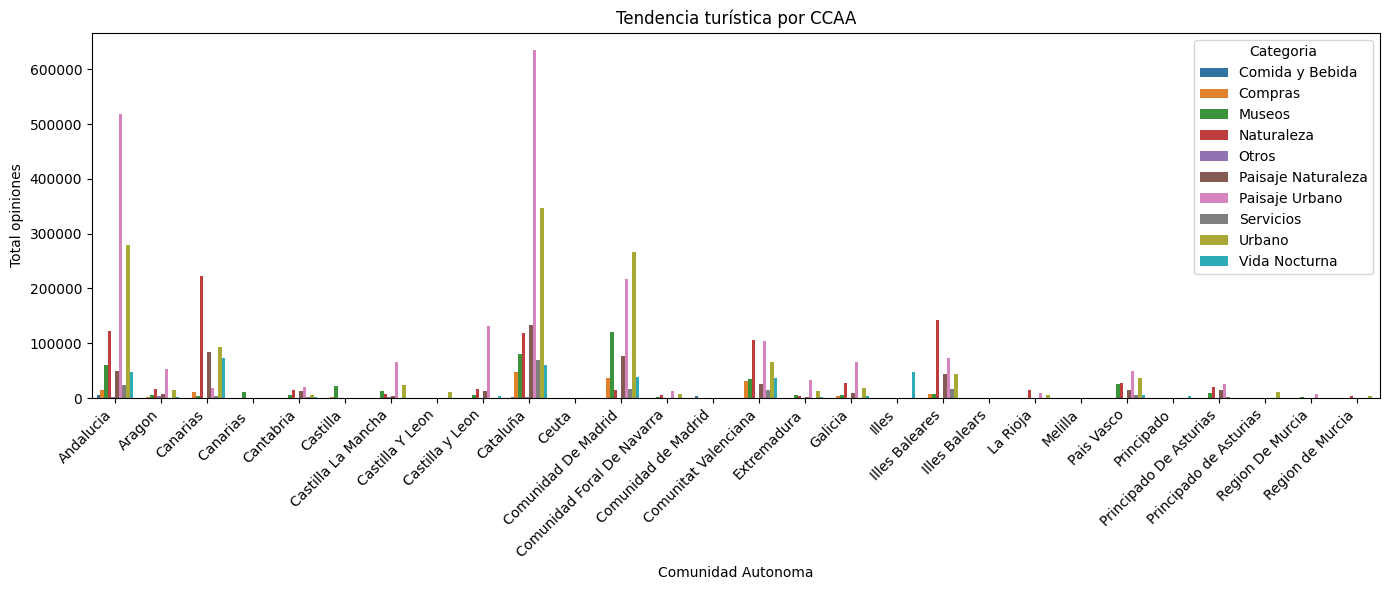

In [ ]:
tendencia_grouped= tendencia_ocio.groupby(["CCAA", "CATEGORIA"])["TOTAL_OPINIONES_CATEGORIA"].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=tendencia_grouped, x="CCAA", y="TOTAL_OPINIONES_CATEGORIA", hue="CATEGORIA")

plt.title("Tendencia turística por CCAA")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Comunidad Autonoma")
plt.ylabel("Total opiniones")
plt.legend(title= "Categoria")
plt.tight_layout()

plt.show()



C:\Users\Flore\AppData\Local\Temp\ipykernel_5700\3721555406.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


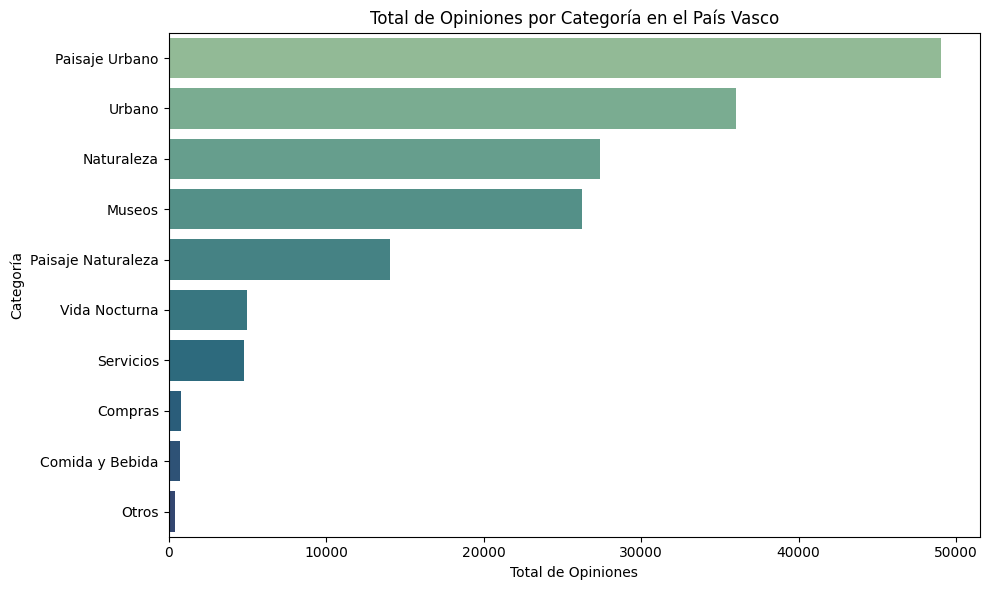

In [37]:
df_sorted= df_grouped.sort_values("TOTAL_OPINIONES_CATEGORIA", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df_sorted,
    y="CATEGORIA",
    x="TOTAL_OPINIONES_CATEGORIA",
    palette="crest"
)

plt.title("Total de Opiniones por Categoría en el País Vasco")
plt.xlabel("Total de Opiniones")
plt.ylabel("Categoría")
plt.tight_layout()
plt.show()

C:\Users\Flore\AppData\Local\Temp\ipykernel_5700\3346863518.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pie["PORCENTAJE"] = df_pie["TOTAL_OPINIONES_CATEGORIA"] / total_opiniones * 100


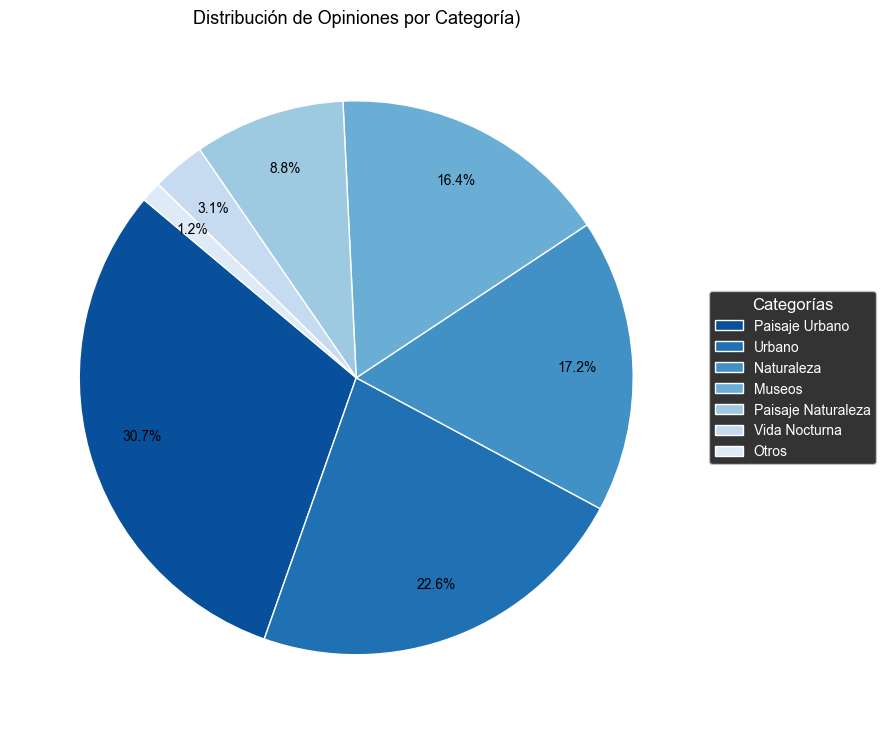

In [42]:
df_pie = df_sorted[df_sorted["CATEGORIA"] != "Servicios"]

# Calcular el total de opiniones
total_opiniones = df_pie["TOTAL_OPINIONES_CATEGORIA"].sum()

# Calcular el porcentaje que representa cada categoría
df_pie["PORCENTAJE"] = df_pie["TOTAL_OPINIONES_CATEGORIA"] / total_opiniones * 100

# Separar categorías mayores al 3% y agrupar el resto en "Otros"
df_mayores = df_pie[df_pie["PORCENTAJE"] >= 3]
df_menores = df_pie[df_pie["PORCENTAJE"] < 3]

# Crear fila para "Otros"
otros_total = df_menores["TOTAL_OPINIONES_CATEGORIA"].sum()
otros_fila = pd.DataFrame({
    "CATEGORIA": ["Otros"],
    "TOTAL_OPINIONES_CATEGORIA": [otros_total],
    "PORCENTAJE": [otros_total / total_opiniones * 100]
})

# Unir todo en un nuevo DataFrame
df_final = pd.concat([df_mayores, otros_fila], ignore_index=True)

# Paleta de azules pastel (de oscuro a claro)
azul_pastel = sns.color_palette("Blues", n_colors=len(df_final))[::-1]

# Gráfico
plt.figure(figsize=(9, 9), facecolor='white')  # Fondo blanco

wedges, texts, autotexts = plt.pie(
    df_final["TOTAL_OPINIONES_CATEGORIA"],
    colors=azul_pastel,
    startangle=140,
    wedgeprops={'edgecolor': 'white'},
    autopct='%1.1f%%',
    pctdistance=0.8,
    textprops={'color': 'black', 'fontsize': 10}
)

# Leyenda externa
plt.legend(
    wedges,
    df_final["CATEGORIA"],
    title="Categorías",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

# Título
plt.title("Distribución de Opiniones por Categoría)", fontsize=13, color='black')

# Ajuste final
plt.tight_layout()
plt.show()